In [10]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [11]:
df = pd.read_csv('cleaned_movies.csv')

Simple Resampling - Random Oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['genres', 'original_language', 'popularity_class']).copy()
y = df['popularity_class']

# should we add differt binding for oversampling?
# in this type of resampling we need numeric feature I added the mean value, but maybe for different algorithm juz adding nr index instead of fore example genres will be better?

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [14]:
df_resampled = pd.concat([X_resampled.reset_index(drop=True), 
                          pd.Series(y_resampled, name='popularity_class')], axis=1)


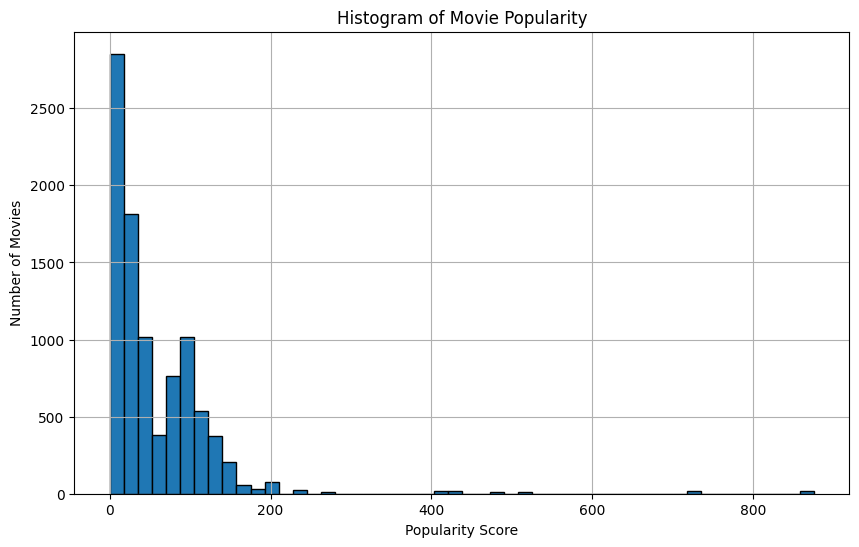

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_resampled['popularity'], bins=50, edgecolor='black')
plt.title('Histogram of Movie Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.savefig('histogram_popularity_simply_resampling_full.png')
plt.show()

SVM

In [18]:
X = df_resampled.drop(columns=['popularity']).copy()
y = df_resampled['popularity']

print(X.dtypes)

budget                int64
runtime             float64
vote_average        float64
vote_count            int64
revenue               int64
release_year          int64
genres_score        float64
language_score      float64
popularity_class      int64
dtype: object


In [19]:
from sklearn.svm import SVR # if the import is needed only in one cell should we put it here or on the top? 

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
    
# 5-fold cross-validation (for R^2 score)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print("R² score for each fold:", scores)
print("Mean R² score:", scores.mean())

# we have to adjust metrics

R² score for each fold: [ 0.53471635  0.69683798  0.06850185  0.30912212 -0.13697223]
Mean R² score: 0.29444121324625594


KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("R² score for each fold:", scores)
print("Mean R² score:", scores.mean())
# we have to adjust metrics

R² score for each fold: [0.95642735 0.85879385 0.88217299 0.9948251  0.98116524]
Mean R² score: 0.9346769070833154
